OCR FOR HAND-WRITTEN DIGITS
By - Aiswarya Garlapati 14CO213

The ANN created to emulate an OCR for hand-written digits consists of:
1. An Input layer that has 784 inputs (Each image is flattened to 28 * 28 to input it)
2. Two hidden layers with 512 and 256 neurons respectively which use the "Relu" activation function.
3. The output layer has 10 neurons and uses "Softmax" Activation function

The best performance is obtained for optimizer "Adam" with batch size 128, and number of epochs = 20, which gives an accuracy of 98.31%. The results for other optimizers can be seen below. A detailed account is attached in the read me file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
np.random.seed(9)
# user inputs
nb_epoch = 20
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

# spliting the MNIST data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()

In [3]:
# reshaping the MNIST dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

In [4]:
#convert class vector to binary class matrix
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

#create model summary
model_summary = model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile the model with SGD Optimizer
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

#fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 8s - loss: 1.0946 - acc: 0.7582 - val_loss: 0.5207 - val_acc: 0.8790
Epoch 2/20
 - 8s - loss: 0.4454 - acc: 0.8855 - val_loss: 0.3645 - val_acc: 0.9046
Epoch 3/20
 - 8s - loss: 0.3540 - acc: 0.9038 - val_loss: 0.3131 - val_acc: 0.9151
Epoch 4/20
 - 8s - loss: 0.3136 - acc: 0.9135 - val_loss: 0.2840 - val_acc: 0.9219
Epoch 5/20
 - 10s - loss: 0.2876 - acc: 0.9189 - val_loss: 0.2658 - val_acc: 0.9264
Epoch 6/20
 - 10s - loss: 0.2682 - acc: 0.9243 - val_loss: 0.2505 - val_acc: 0.9301
Epoch 7/20
 - 10s - loss: 0.2524 - acc: 0.9288 - val_loss: 0.2371 - val_acc: 0.9346
Epoch 8/20
 - 10s - loss: 0.2387 - acc: 0.9328 - val_loss: 0.2261 - val_acc: 0.9367
Epoch 9/20
 - 10s - loss: 0.2269 - acc: 0.9360 - val_loss: 0.2172 - val_acc: 0.9391
Epoch 10/20
 - 10s - loss: 0.2163 - acc: 0.9386 - val_loss: 0.2073 - val_acc: 0.9407
Epoch 11/20
 - 10s - loss: 0.2067 - acc: 0.9422 - val_loss: 0.1985 - val_acc: 0.9428
Epoch 12/20
 - 10s - loss: 0

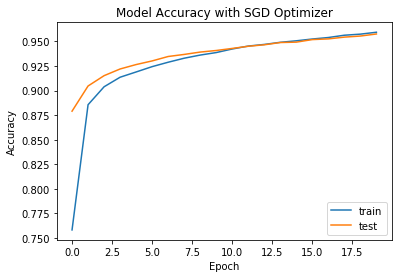

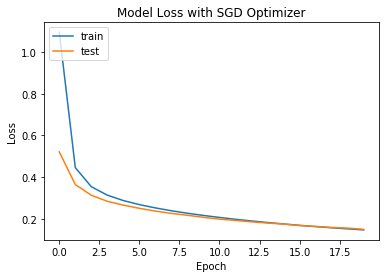

Test Score - 0.14978676378
Test Accuracy - 0.9575


In [6]:
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy with SGD Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss with SGD Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

print "Test Score - {}".format(scores[0])
print "Test Accuracy - {}".format(scores[1])

In [7]:
# compile the model with Adagrad Optimizer
model.compile(loss="categorical_crossentropy", optimizer="adagrad", metrics=["accuracy"])

#fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.2387 - acc: 0.9476 - val_loss: 0.0892 - val_acc: 0.9710
Epoch 2/20
 - 10s - loss: 0.0688 - acc: 0.9797 - val_loss: 0.0741 - val_acc: 0.9777
Epoch 3/20
 - 12s - loss: 0.0458 - acc: 0.9868 - val_loss: 0.0662 - val_acc: 0.9788
Epoch 4/20
 - 11s - loss: 0.0335 - acc: 0.9908 - val_loss: 0.0637 - val_acc: 0.9805
Epoch 5/20
 - 11s - loss: 0.0251 - acc: 0.9937 - val_loss: 0.0606 - val_acc: 0.9815
Epoch 6/20
 - 12s - loss: 0.0193 - acc: 0.9957 - val_loss: 0.0567 - val_acc: 0.9831
Epoch 7/20
 - 12s - loss: 0.0151 - acc: 0.9970 - val_loss: 0.0577 - val_acc: 0.9819
Epoch 8/20
 - 15s - loss: 0.0121 - acc: 0.9981 - val_loss: 0.0565 - val_acc: 0.9830
Epoch 9/20
 - 16s - loss: 0.0098 - acc: 0.9985 - val_loss: 0.0573 - val_acc: 0.9828
Epoch 10/20
 - 15s - loss: 0.0079 - acc: 0.9990 - val_loss: 0.0570 - val_acc: 0.9833
Epoch 11/20
 - 12s - loss: 0.0066 - acc: 0.9992 - val_loss: 0.0568 - val_acc: 0.9826
Epoch 12/20
 - 16s - loss

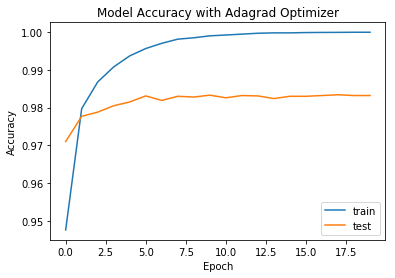

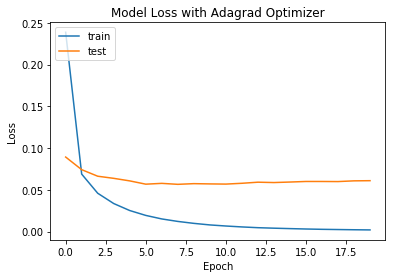

Test Score - 0.0608811515111
Test Accuracy - 0.9832


In [8]:
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy with Adagrad Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss with Adagrad Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

print "Test Score - {}".format(scores[0])
print "Test Accuracy - {}".format(scores[1])

In [9]:
# compile the model with Adagrad Optimizer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)




Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 12s - loss: 0.0405 - acc: 0.9860 - val_loss: 0.0727 - val_acc: 0.9792
Epoch 2/20
 - 11s - loss: 0.0292 - acc: 0.9905 - val_loss: 0.0807 - val_acc: 0.9764
Epoch 3/20
 - 14s - loss: 0.0239 - acc: 0.9914 - val_loss: 0.0800 - val_acc: 0.9766
Epoch 4/20
 - 13s - loss: 0.0153 - acc: 0.9947 - val_loss: 0.0857 - val_acc: 0.9783
Epoch 5/20
 - 13s - loss: 0.0179 - acc: 0.9938 - val_loss: 0.0886 - val_acc: 0.9771
Epoch 6/20
 - 14s - loss: 0.0145 - acc: 0.9953 - val_loss: 0.1036 - val_acc: 0.9759
Epoch 7/20
 - 14s - loss: 0.0162 - acc: 0.9945 - val_loss: 0.0769 - val_acc: 0.9816
Epoch 8/20
 - 17s - loss: 0.0114 - acc: 0.9961 - val_loss: 0.0761 - val_acc: 0.9834
Epoch 9/20
 - 13s - loss: 0.0115 - acc: 0.9961 - val_loss: 0.0793 - val_acc: 0.9805
Epoch 10/20
 - 17s - loss: 0.0115 - acc: 0.9960 - val_loss: 0.1053 - val_acc: 0.9807
Epoch 11/20
 - 17s - loss: 0.0108 - acc: 0.9963 - val_loss: 0.1112 - val_acc: 0.9765
Epoch 12/20
 - 14s - los

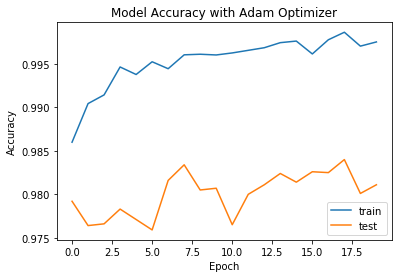

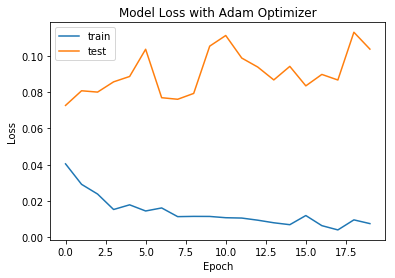

Test Score - 0.103680919971
Test Accuracy - 0.9811


In [10]:
# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy with Adam Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="lower right")
plt.show()

# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss with Adam Optimizer")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

print "Test Score - {}".format(scores[0])
print "Test Accuracy - {}".format(scores[1])

Results with different Optimizers:

SGD - 95.75%
Adagrad - 98.32%
Adam - 98.11%